In [53]:
import numpy as np
import pandas as pd
import sys
import os
current_path = os.path.dirname(os.path.abspath('__file__'))
project_path = os.path.dirname(os.path.dirname(current_path))
sys.path.append(project_path)
from data.fetch_uci import UCI_fetcher, uci_path
from ucimlrepo import fetch_ucirepo 

In [3]:
uci = fetch_ucirepo(id=144)
uci_data = uci.data

In [4]:
features = pd.DataFrame(uci_data.features)
labels = pd.DataFrame(uci_data.targets)

In [5]:
features.columns = ["account_status","period","history_credit","credit_purpose","credit_limit",
               "saving_account","person_employee","income_installment_rate","marry_sex","other_debtor",
               "address","property","age","installment_plans","housing",
               "credits_num","job","dependents","have_phone","foreign_worker"]
features.head()

,account_status,period,history_credit,credit_purpose,credit_limit,saving_account,person_employee,income_installment_rate,marry_sex,other_debtor,address,property,age,installment_plans,housing,credits_num,job,dependents,have_phone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [6]:
labels.columns = ["target"]
labels.target = labels.target - 1
labels.head()

,target
0,0
1,1
2,0
3,0
4,1


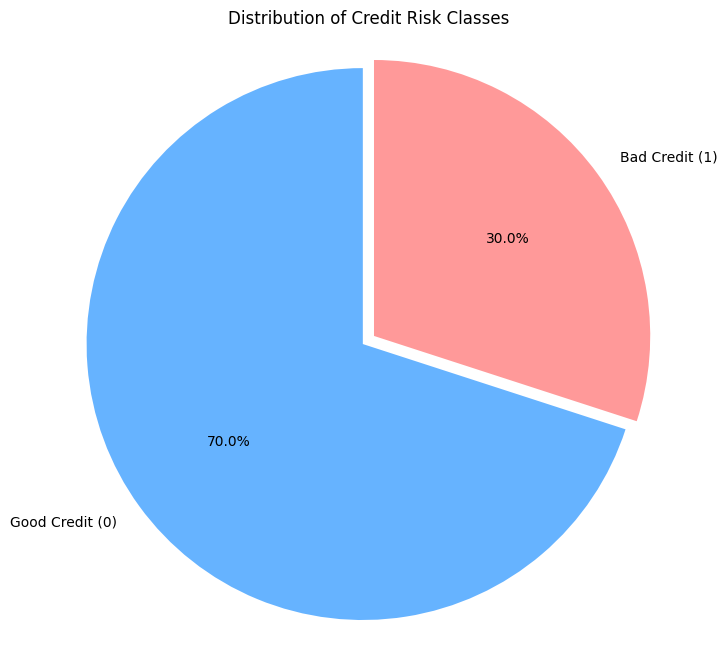

Good Credit (0): 700 samples
Bad Credit (1): 300 samples


In [7]:
import matplotlib.pyplot as plt

target_counts = labels['target'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=['Good Credit (0)', 'Bad Credit (1)'], 
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'],
        explode=(0.05, 0))
plt.title('Distribution of Credit Risk Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# 显示每个类别的数量
print(f"Good Credit (0): {target_counts[0]} samples")
print(f"Bad Credit (1): {target_counts[1]} samples")

In [8]:
def category_continue_separation(df, feature_names):
    categorical_var = []
    numerical_var = []
    if 'target' in feature_names:
        feature_names.remove('target')
    ## First determine the type, if it's int or float, treat it directly as a continuous variable
    numerical_var = list(df[feature_names].select_dtypes(include=['int','float','int32','float32','int64','float64']).columns.values)
    categorical_var = [x for x in feature_names if x not in numerical_var]
    return categorical_var, numerical_var

def data_analysis_plot(categorical_var, df, start, mid, row, col, showlabel=False):
    p = 1
    plt.figure(figsize=(20,18))
    for i in categorical_var[start:mid]:
        df_var = "df_" + i
        df_var = pd.crosstab(df[i], df["target"])
        df_var["bad_rate"] = round(df_var[1]/(df_var[1]+df_var[0]), 4)
        # print('df_var', df_var)
        # print(df_var.index)
        # print(df_var.columns)
        # print(p)

        # Add subplot drawing
        ax1 = plt.subplot(row, col, p) # Subplot space with n rows and n columns

        year = df_var.index # x-axis
        data1 = df_var[0] # y-axis good users
        data2 = df_var[1] # y-axis bad users
        data3 = df_var["bad_rate"]

        # First get the length of year, then get the index list
        x = range(len(year))
        bar_width = 0.3

        # Bar chart for good and bad users
        ax1.bar(x, data1, width=bar_width, color='#3A669C', label="Good Users")
        # Move 0.2 to the right, bar width is 0.2
        ax1.bar([i + bar_width for i in x], data2, width=bar_width, color='#C0504D', label="Default Users")

        # Move the bottom text to the middle of the two bars (originally the text is under the blue bar on the left, move 0.1 to the right)
        plt.xticks([i + bar_width/2 for i in x], year)
        if p == 1 or p == col+1:
            ax1.set_ylabel('Number of Users', size=10)
        ax1.set_xlabel(i, size=10)

        text_heiht = 3
        # Add value labels for each bar
        for x1, y1 in enumerate(data1):
            ax1.text(x1, y1+text_heiht, y1, ha='center', fontsize=8)
        for x2, y2 in enumerate(data2):
            ax1.text(x2+bar_width, y2+text_heiht, y2, ha='center', fontsize=8)

        # bad_rate line sharing the y-axis
        ax2 = ax1.twinx()
        p3 = ax2.plot([i + bar_width/2 for i in x], data3, color="gray", linestyle='--', label="Bad User Ratio")
        
        if p == 3 or p == 6:
            ax2.set_ylabel("Bad User Ratio")

        if p == 1 and showlabel == True:
            ax1.legend(loc="upper center")
            ax2.legend(loc=2)
        
        p = p + 1

Categorical features: 13
Numerical features: 7


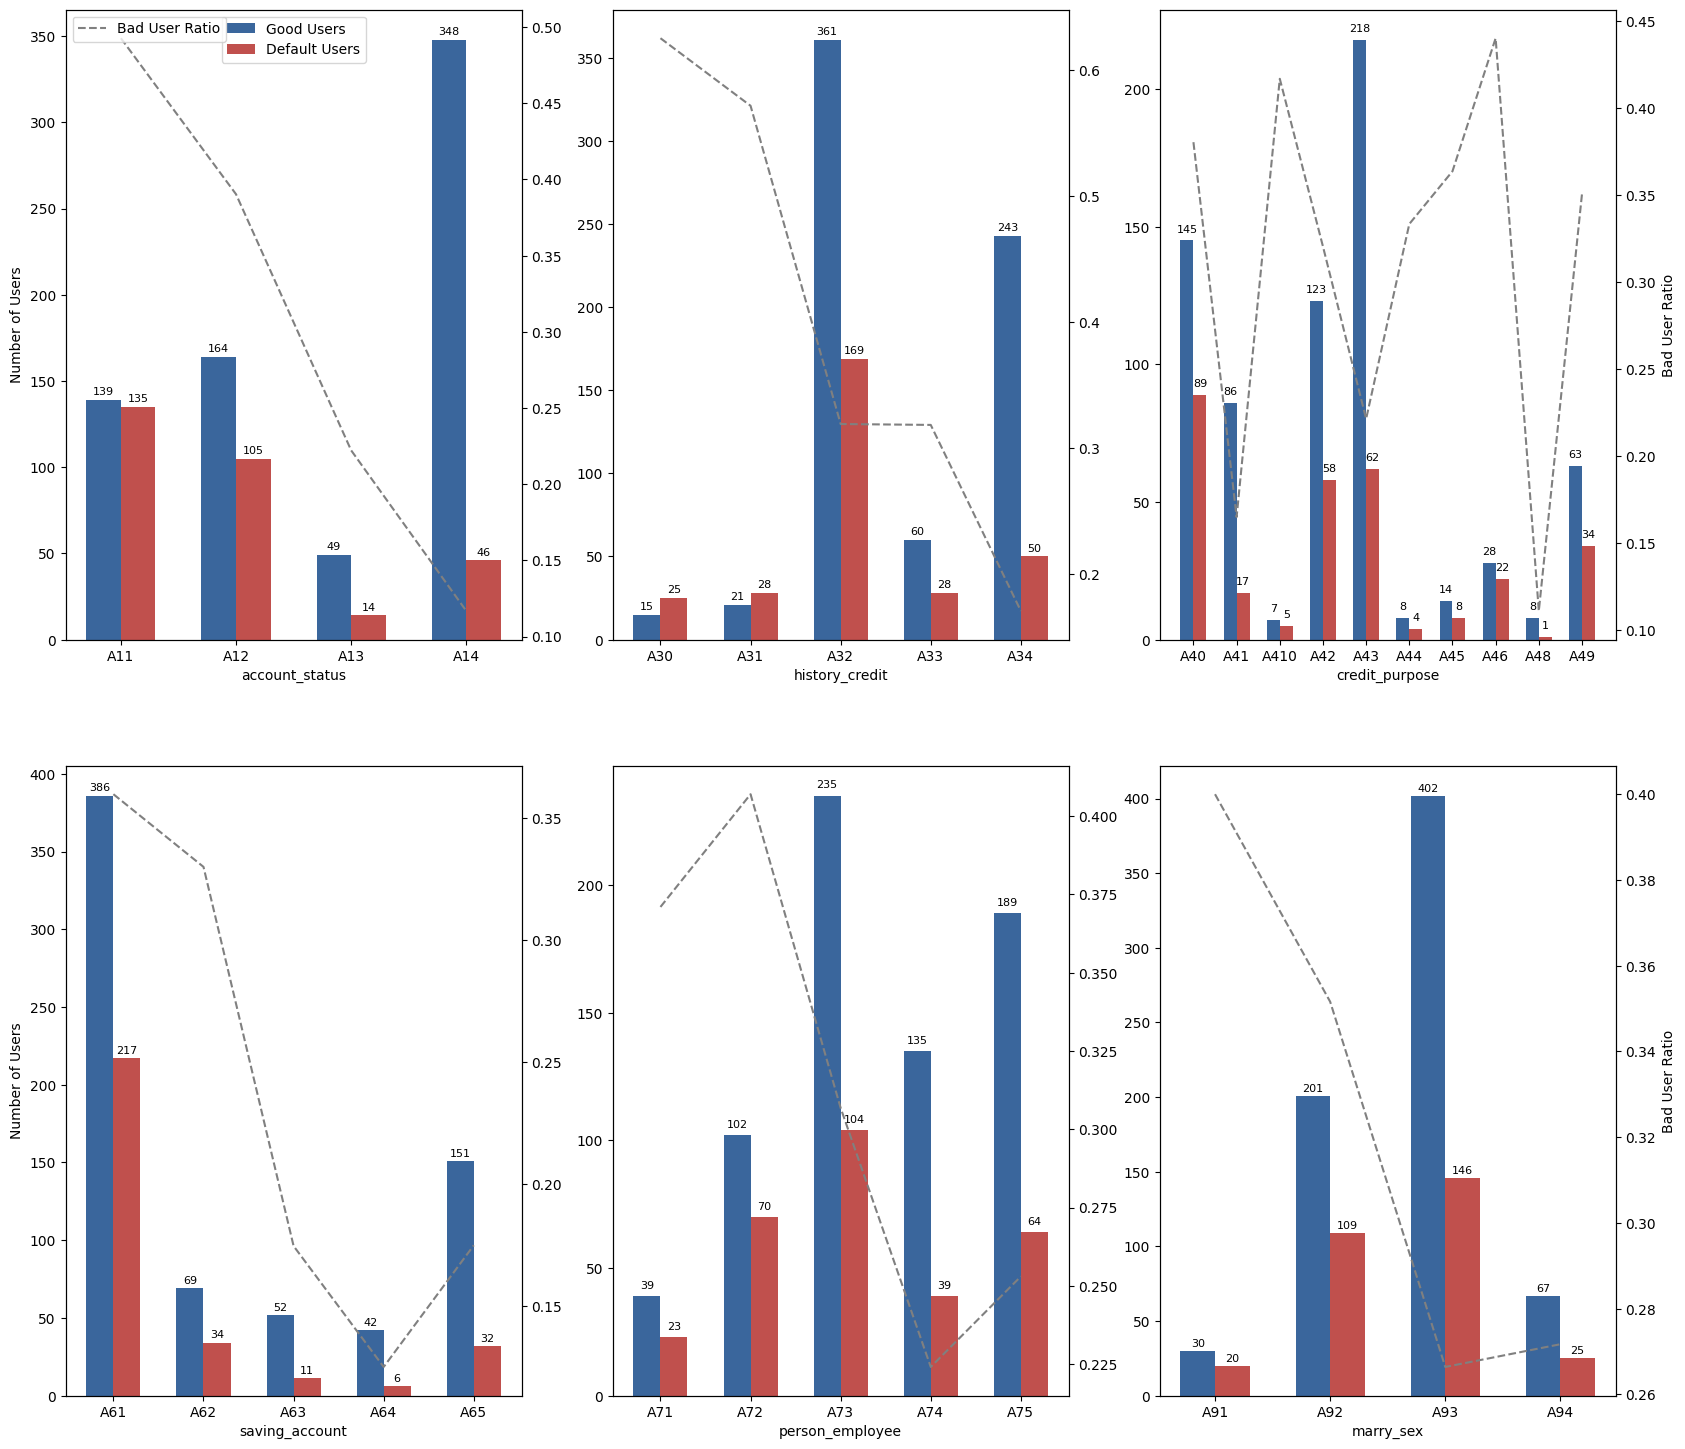

In [9]:

# 使用方法示例
# 将特征分为分类变量和数值变量
all_features = features.columns.tolist()
categorical_features, numerical_features = category_continue_separation(features, all_features)

print(f"Categorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")

analysis_df = features.copy()
analysis_df['target'] = labels['target']

data_analysis_plot(categorical_features, analysis_df, 0, 6, 2, 3, showlabel=True)

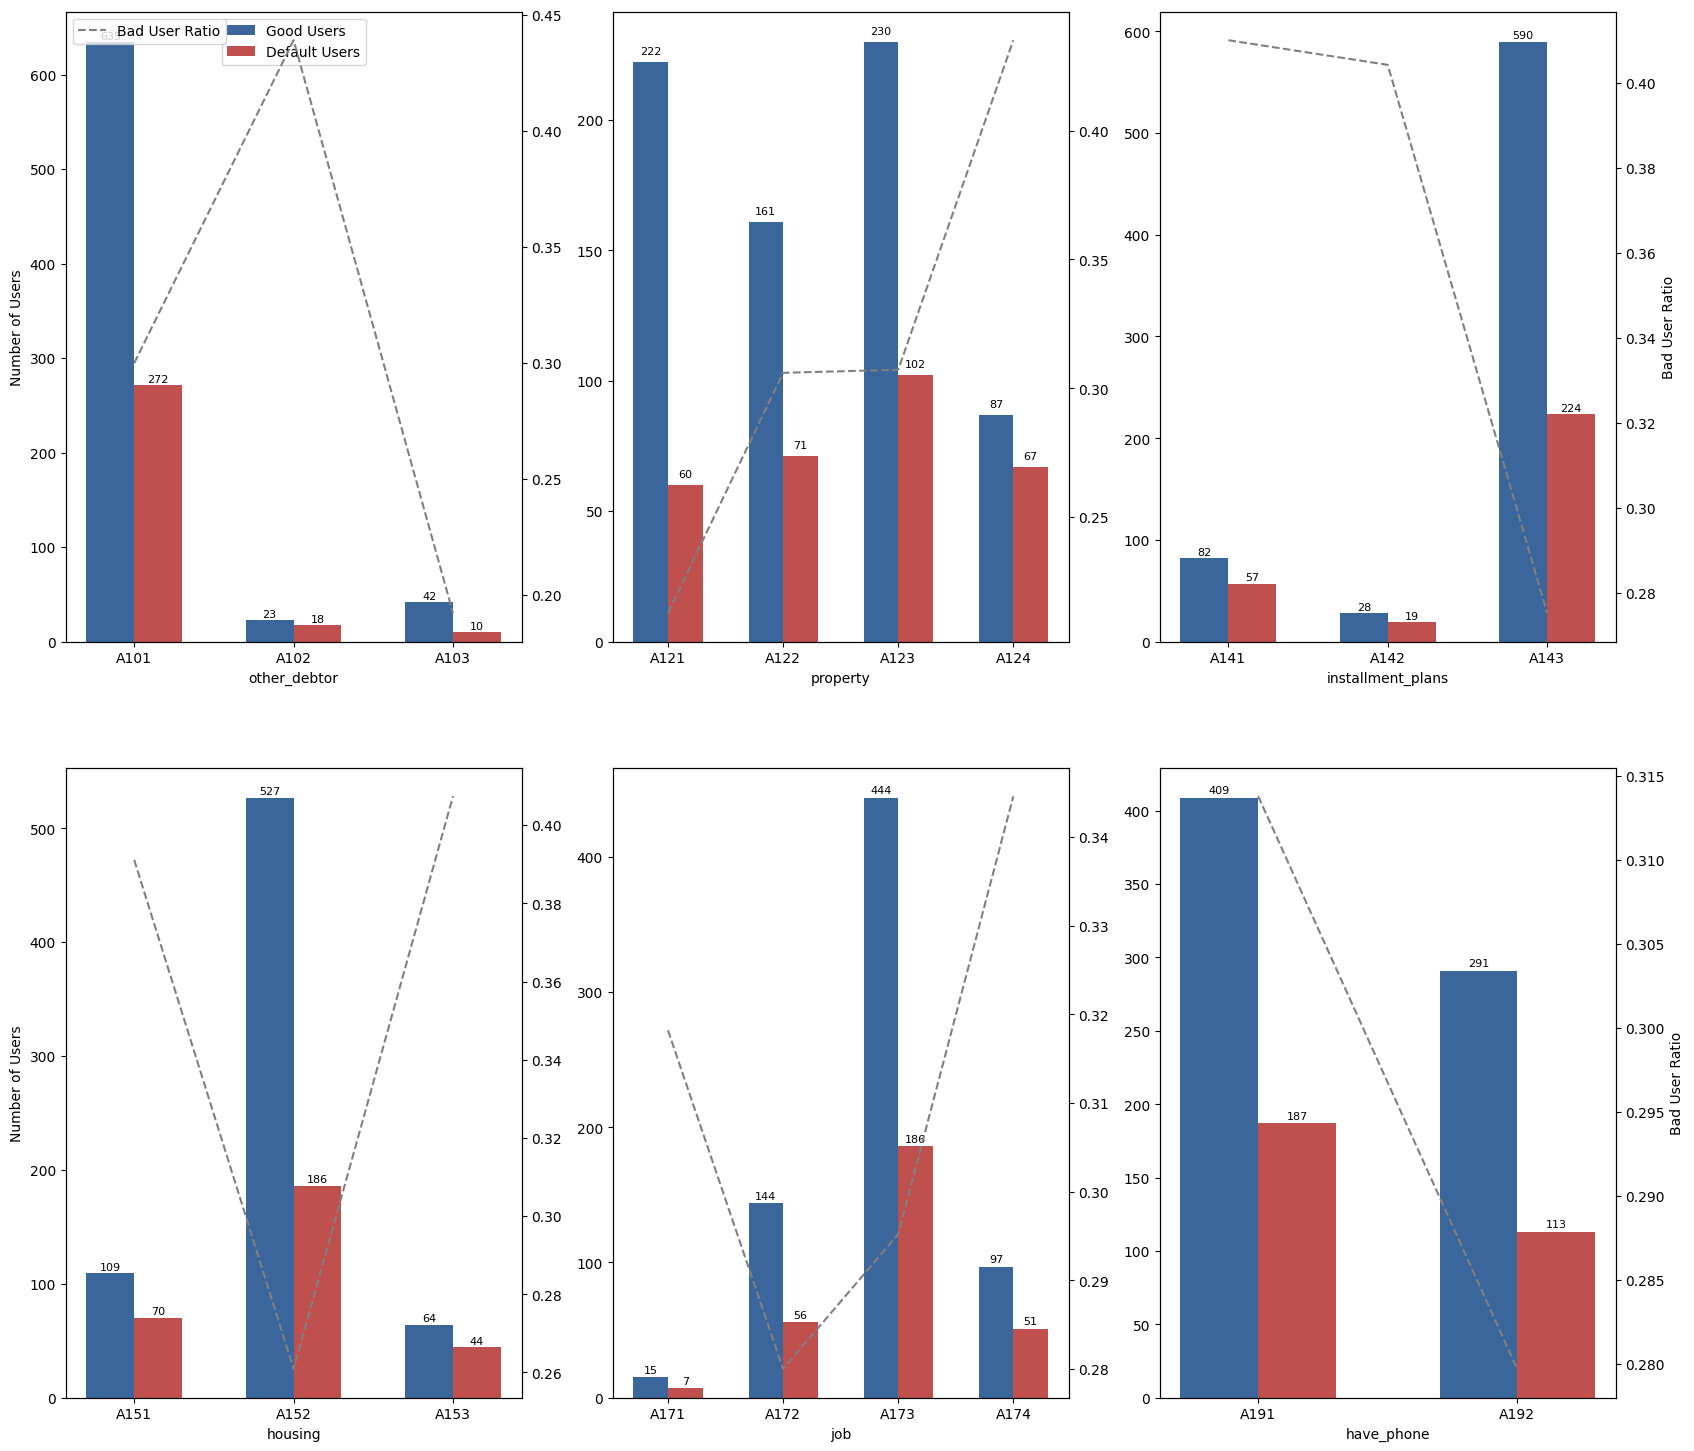

In [10]:
data_analysis_plot(categorical_features, analysis_df, 6, 12, 2, 3, showlabel=True)

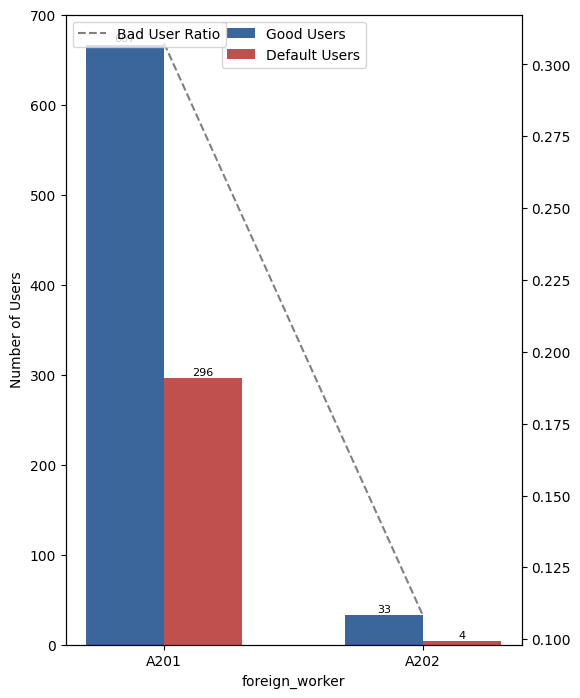

In [11]:
data_analysis_plot(categorical_features, analysis_df, 12, len(categorical_features), 2, 3, showlabel=True)

结论：
1. 支票账户金额<0的人群中，接近一半的人是坏用户，有支票账户的人中，账户金额越高，坏用户的占比逐渐降低（有钱的用户，信用会相对较高），没有支票账户的人最多，其坏用户的占比最低（理性消费人群？）
2. 对于历史信用这块，存在未到期的信贷用户的占比最高，同时坏用户占比大概30%
3. 对于借款目的，买汽车用户数量较高，坏用户占比也相对较高；买广播/电视的人数最多，但其坏用户占比相对较低，风险相对较低；
4. 储蓄账户金额<100的用户占了60%，没有储蓄账户的人占了18%，坏用户也集中分布在这两个区间（来这儿借款的人一般都是被银行不通过的人，这部分人没钱，需要钱）；
5. 绝大部分用户都工作了1年以上，工作1-4年的人数最多；一半以上的人工作是熟练工或官员；
6. 对于财产这块，有房产和有汽车的用户占了2/3；在有自己房产的人群中，坏用户的比例大概在1/5；
7. 对于分期计划，绝大部分人没有分期，同时这部分人的坏用户比例也是最低的，可以关注下这部分人群，考虑分期收益，是否考虑让其分期；
8. 对于有没有担保人这一项来说，无担保人的用户最多，其坏用户数量也很高，但是因为无担保人的用户占了90%左右，这个变量的区分度猜测也不是很高，预测能力不强；
9. 只有很小一部分人没有国外工作的经历，绝大部分人有国外工作的经历，这个变量来看如果用其区分好坏特征，没有什么分辨性，不具有好的预测效果，后面特征建模的时候也能验证。

In [12]:
features.describe()

,period,credit_limit,income_installment_rate,address,age,credits_num,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [13]:
labels.describe()

,target
count,1000.000000
mean,0.300000
std,0.458487
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [14]:
def data_analysis_plot_num(numerical_var, df, start, mid, row, col, showlabel=False):
    p = 1
    plt.figure(figsize=(20,18))
    for i in numerical_var[start:mid]:
        df_var = "df_" + i
        df_var = pd.DataFrame({'target':df["target"],'variables':df[i]})
        
        df_var_good = df_var.loc[df_var["target"]==0,]
        df_var_good = df_var_good.sort_values(["variables"]) #sort

        df_var_bad = df_var.loc[df_var["target"]==1,]
        df_var_bad = df_var_bad.sort_values(["variables"]) #sort
        
        plt.subplot(row,col,p) #subplot space as 2 rows 3 columns
        if i == "period" or i == "age":
            bins_i = 60
        elif i == "credit_limit":
            bins_i = 150
        else:
            bins_i = 50
        # plt.hist(df_var_good["variables"],bins=bins_i,color='r',alpha=0.5,rwidth=0.6,normed=True,label='good users')
        # plt.hist(df_var_bad['variables'],bins=bins_i,color='b',alpha=0.5,rwidth=0.6,normed=True,label='bad users')
        plt.hist(df_var_good["variables"],bins=bins_i,color='r',alpha=0.5,rwidth=0.6,density=True,label='good users')
        plt.hist(df_var_bad['variables'],bins=bins_i,color='b',alpha=0.5,rwidth=0.6,density=True,label='bad users')
        plt.legend()
        if p == 1:
            plt.title('Good and Bad Users Distribution Histogram')
        plt.xlabel(i)
        plt.ylabel('count')

        p = p+1

In [15]:
# 合并特征和标签数据
df = pd.concat([features, labels], axis=1)

# 获取数值型变量列表
numerical_variables = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

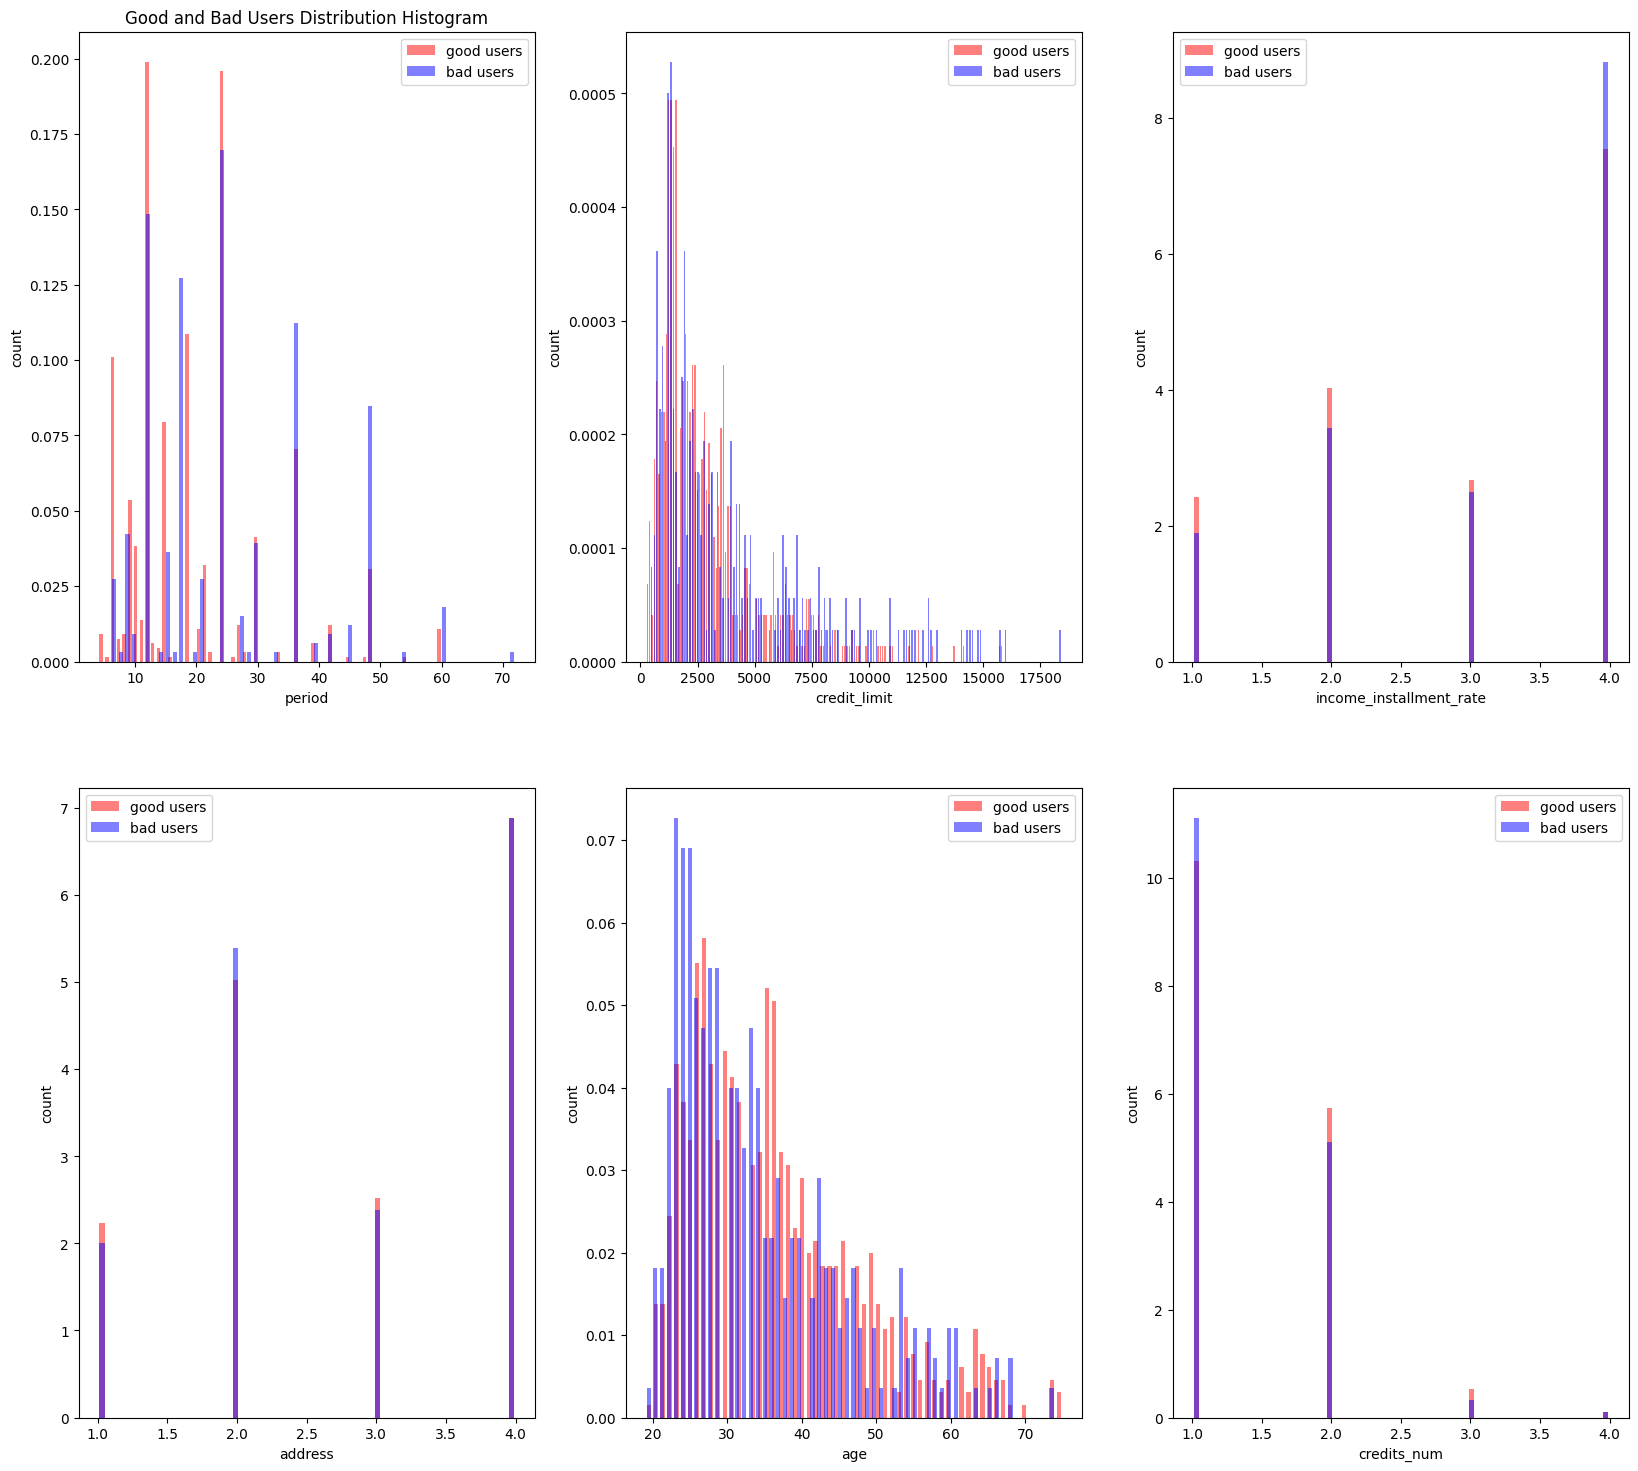

In [16]:
# 绘制前6个数值型变量的分布图
data_analysis_plot_num(numerical_variables, df, 0, 6, 2, 3)

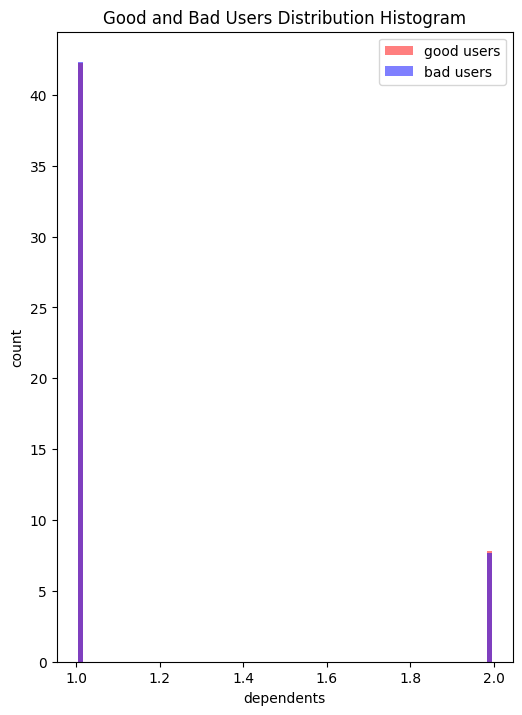

In [17]:
# 如果数值型变量较多，可以分批次绘制
if len(numerical_variables) > 6:
    data_analysis_plot_num(numerical_variables, df, 6, len(numerical_variables), 2, 3)

* 对于账期，好样本用户大多<30天，而坏用户的账期分布右偏相对于好用户严重一些，相对较长的账期中，坏用户占比比好用户高；
* 对于额度，数据呈现右偏状态，尾部拉长，低额度的时候坏用户占比比较多，中间部分额度，好用户占比较高，对于大额，坏用户的比例高于好用户；
* 对于年龄，低年龄段的人群，明显坏用户占比高于好用户，随着年龄增长，好用户的占比上升，数据也呈现右偏状态。

In [18]:
df.head()

,account_status,period,history_credit,credit_purpose,credit_limit,saving_account,person_employee,income_installment_rate,marry_sex,other_debtor,...,property,age,installment_plans,housing,credits_num,job,dependents,have_phone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


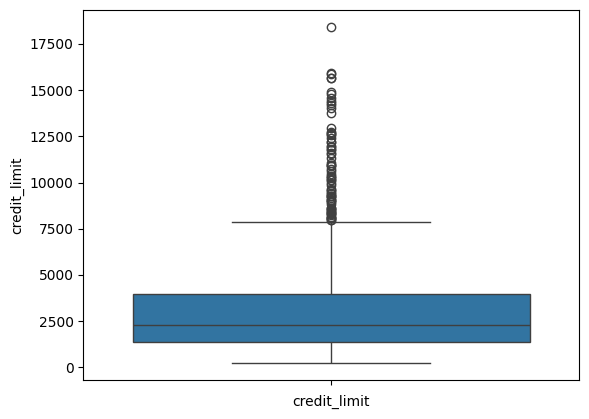

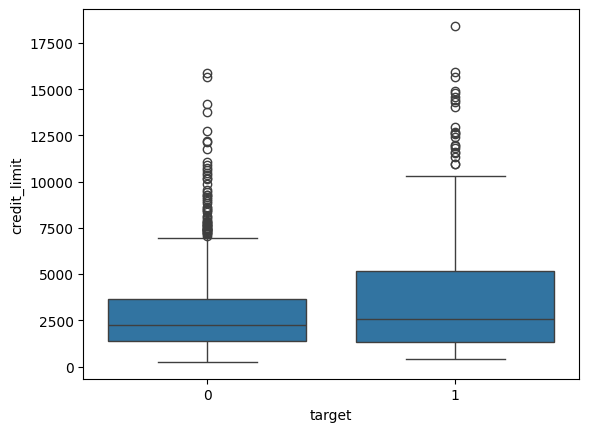

In [19]:
import seaborn as sns
ax = sns.boxplot(y="credit_limit", data=df)
plt.xlabel('credit_limit')
plt.show()

ax = sns.boxplot(x="target", y="credit_limit", data=df)
plt.xlabel('target')
plt.show()

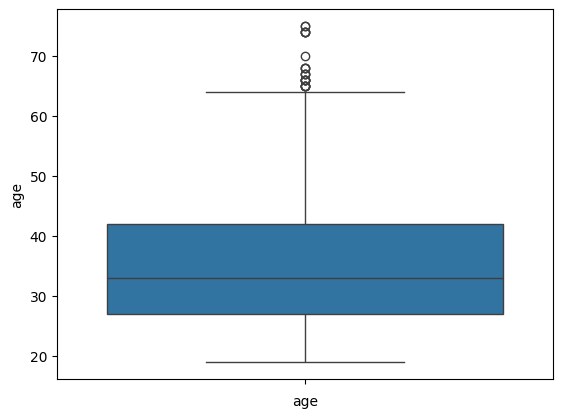

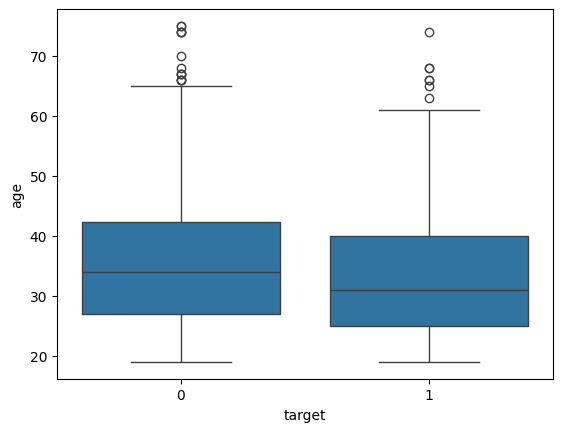

In [20]:
import seaborn as sns
ax = sns.boxplot(y="age", data=df)
plt.xlabel('age')
plt.show()

ax = sns.boxplot(x="target", y="age", data=df)
plt.xlabel('target')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=10, stratify=df.target)

In [23]:
import pandas as pd
import numpy as np

# Process categorical variables and convert to string type
categorical_var = []
numerical_var = []

for s in set(numerical_var):
    print('Variable ' + s + ' may have ' + str(len(data_train[s].unique())) + ' unique values')
    
    if len(data_train[s].unique()) <= 10:
        categorical_var.append(s)
        numerical_var.remove(s)
        
        # Convert numerical variables to string type if they are categorical
        index_1 = data_train[s].isnull()
        if sum(index_1) > 0:
            data_train.loc[~index_1, s] = data_train.loc[~index_1, s].astype('str')
        else:
            data_train[s] = data_train[s].astype('str')
        
        index_2 = data_test[s].isnull()
        if sum(index_2) > 0:
            data_test.loc[~index_2, s] = data_test.loc[~index_2, s].astype('str')
        else:
            data_test[s] = data_test[s].astype('str')

# Function to calculate IV and WOE
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")
    
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # Total count
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good count (target == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad count (target == 1)
  
    # Convert the results into a dataframe
    data = pd.DataFrame(lst, columns=['Variable', 'value', 'All', 'Good', 'Bad']) 
   
    # Calculate share and bad rate
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']

    # Calculate WOE and IV
    data['Distribution Good'] = (data['Good']) / (data['Good'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])
    data = data.sort_values(by=['Variable', 'value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    # Return IV and details
    iv = data['IV'].sum()
    print(f'This variable\'s IV is: {iv}')
    print(df[feature].value_counts())
    return iv, data

# Function for binning continuous variables
def get_category_bin(df, col, binsnum, labels, qcut=False):
    if qcut:
        localdf = pd.qcut(df[col], q=binsnum, labels=labels)
    else:
        localdf = pd.cut(df[col], bins=binsnum, labels=labels)  # Equal length binning
    
    localdf = pd.DataFrame(localdf) 
    name = col + '_bin'
    localdf[name] = localdf[col]
    df = df.join(localdf[name])  # Add the new binning column to the dataframe
    df[name] = df[name].astype(object)  # Ensure it's an object type column
    return df



This variable's IV is: 0.6660115033513336
account_status
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64
This variable's IV is: 0.3095374309984388
period
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
7       5
45      5
39      5
13      4
14      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64
This variable's IV is: 0.2932335473908263
history_credit
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64
This variable's IV is: 0.16919506567307832
credit_purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64


d:\projects\ml25521\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\projects\ml25521\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


This variable's IV is: 0.04210822801901129
credit_limit
1275    3
1262    3
1478    3
1393    3
1258    3
       ..
454     1
1715    1
2520    1
3568    1
7166    1
Name: count, Length: 921, dtype: int64
This variable's IV is: 0.19600955690422672
saving_account
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64
This variable's IV is: 0.086433631026641
person_employee
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64
This variable's IV is: 0.026322090054334526
income_installment_rate
4    476
2    231
3    157
1    136
Name: count, dtype: int64
This variable's IV is: 0.04467067763379073
marry_sex
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64
This variable's IV is: 0.032019322019485055
other_debtor
A101    907
A103     52
A102     41
Name: count, dtype: int64
This variable's IV is: 0.0035887731887050208
address
4    413
2    308
3    149
1    130
Name: count, dtype: int64
This variable's IV is: 0.112638

d:\projects\ml25521\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


This variable's IV is: 0.3095374309984388
period
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
7       5
45      5
39      5
13      4
14      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64
This variable's IV is: 0.2932335473908263
history_credit
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64
This variable's IV is: 0.16919506567307832
credit_purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64


d:\projects\ml25521\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


This variable's IV is: 0.04210822801901129
credit_limit
1275    3
1262    3
1478    3
1393    3
1258    3
       ..
454     1
1715    1
2520    1
3568    1
7166    1
Name: count, Length: 921, dtype: int64
This variable's IV is: 0.19600955690422672
saving_account
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64
This variable's IV is: 0.086433631026641
person_employee
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64
This variable's IV is: 0.026322090054334526
income_installment_rate
4    476
2    231
3    157
1    136
Name: count, dtype: int64
This variable's IV is: 0.04467067763379073
marry_sex
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64
This variable's IV is: 0.032019322019485055
other_debtor
A101    907
A103     52
A102     41
Name: count, dtype: int64
This variable's IV is: 0.0035887731887050208
address
4    413
2    308
3    149
1    130
Name: count, dtype: int64
This variable's IV is: 0.112638

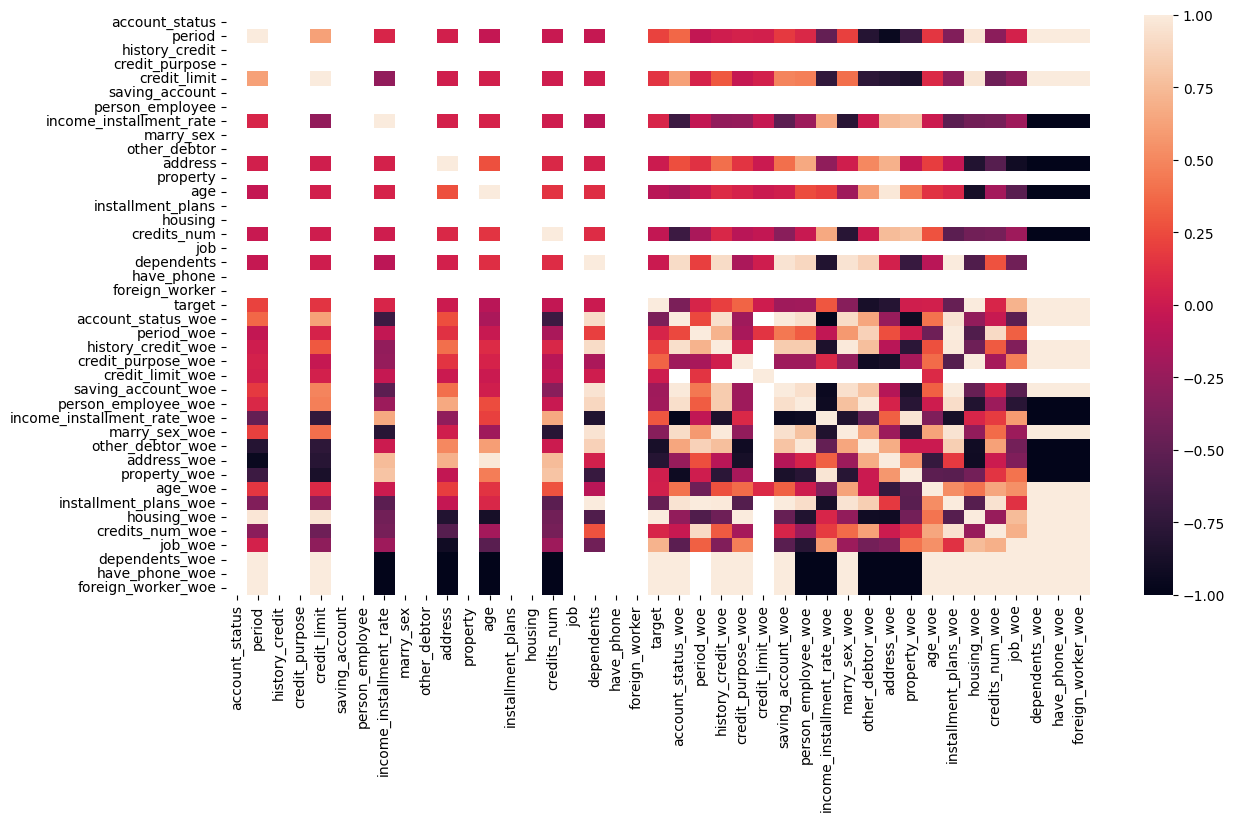

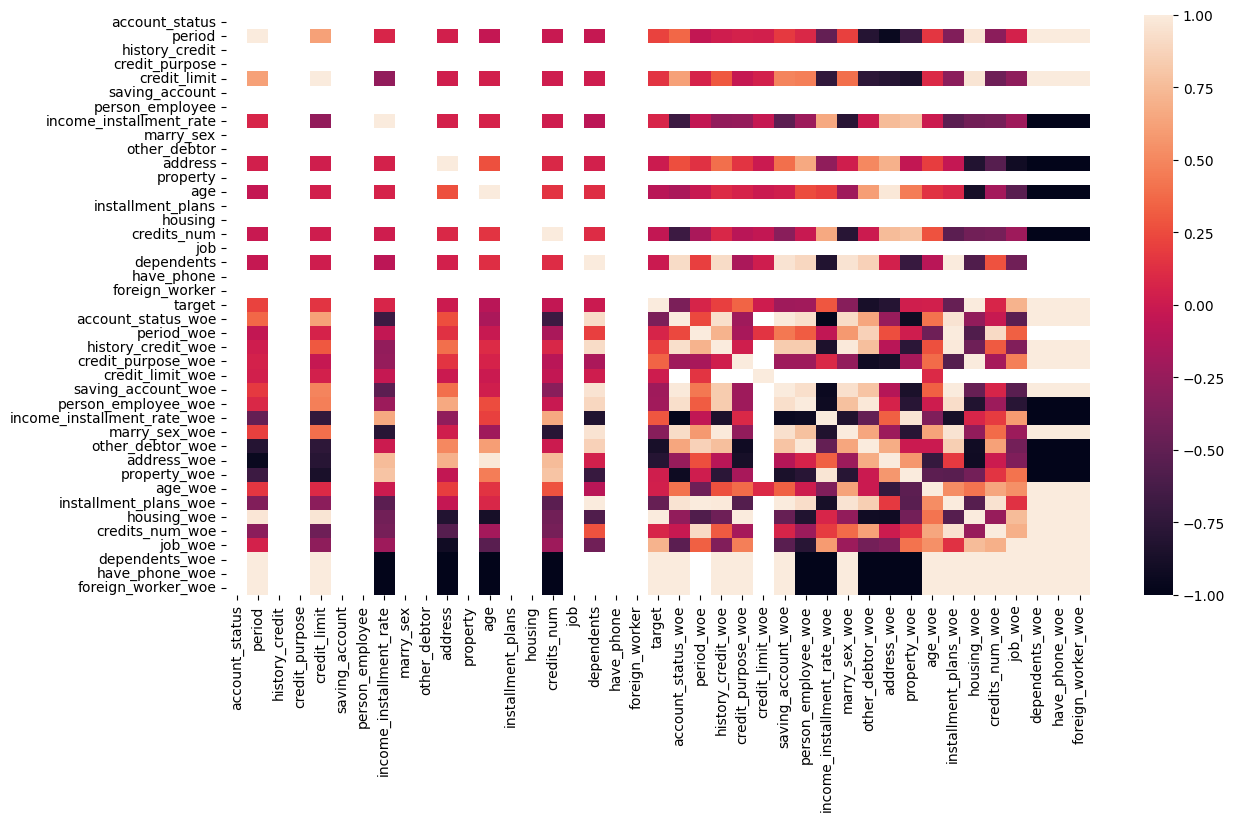

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经有一个数据集df，目标变量是'target'
# 创建 WOE 变换后的数据集
data_train_woe = df.copy()

# 计算 IV 和 WOE
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")
    
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # Total count
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good count (target == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad count (target == 1)
  
    # 创建 DataFrame 存储数据
    data = pd.DataFrame(lst, columns=['Variable', 'value', 'All', 'Good', 'Bad']) 
   
    # 计算 Share 和 Bad Rate
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']

    # 计算 WOE 和 IV
    data['Distribution Good'] = (data['Good']) / (data['Good'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])
    data = data.sort_values(by=['Variable', 'value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print(f'This variable\'s IV is: {iv}')
    print(df[feature].value_counts())
    return iv, data

# 进行 WOE 变换
for col in df.columns:
    if col not in ['target']:  # 假设 'target' 是目标变量
        _, woe_data = calc_iv(df, feature=col, target='target')
        # 将 WOE 转换后的值加入到 data_train_woe 中
        data_train_woe[col + '_woe'] = woe_data['WoE']

# 计算 IV 值并排序
ivtable = {}  # 存储 IV 值
for feature in df.columns:
    if feature != 'target':  # 计算目标变量以外的每个特征的 IV 值
        iv, _ = calc_iv(df, feature, target='target')
        ivtable[feature] = iv  # 将每个特征的 IV 值存储在 ivtable 中

# 将 IV 值转换为 DataFrame，并进行排序
df_iv_values = pd.DataFrame.from_dict(ivtable, orient='index')
df_iv_values.columns = ['iv']
df_iv_values = df_iv_values.sort_values(by=["iv"], ascending=False)

# 筛选出 IV 大于 0.02 的特征
df_iv_cols = list(df_iv_values[df_iv_values['iv'] > 0.02].index)
df_iv_cols.append('target')  # 添加目标变量

# 计算相关性矩阵
# correlation_table = pd.DataFrame(data_train_woe.corr())
# Convert all columns in data_train_woe to numeric (force conversion of WOE columns)
data_train_woe = data_train_woe.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix for the numeric columns only
correlation_table = pd.DataFrame(data_train_woe.corr())

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_table)
plt.subplots_adjust(bottom=0.3, left=0.3)
plt.show()

# 绘制热力图
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_table)
plt.subplots_adjust(bottom=0.3, left=0.3)
plt.show()


In [25]:
# Apply WOE transformation on test data
data_test_woe = data_test.copy()

for col in data_test.columns:
    if col != 'target':  # Assuming 'target' is the target variable
        _, woe_data = calc_iv(data_test, feature=col, target='target')
        # Add the WOE transformed values to data_test_woe
        data_test_woe[col + '_woe'] = woe_data['WoE']

# Define training data (X) and target (y)
x_train = np.array(data_train_woe[[i for i in data_train_woe.columns if i != 'target']])
y_train = np.array(data_train_woe.target)

# Define test data (X) and target (y)
x_test = np.array(data_test_woe[[i for i in data_test_woe.columns if i != 'target']])
y_test = np.array(data_test_woe.target)

This variable's IV is: 0.8850323937672985
account_status
A14    76
A11    66
A12    45
A13    13
Name: count, dtype: int64
This variable's IV is: 0.16060401631834148
period
12    42
24    35
18    23
36    19
15    15
6     13
9      9
30     7
21     6
48     6
10     4
60     3
14     3
11     2
27     2
20     2
42     2
7      1
5      1
26     1
39     1
8      1
13     1
4      1
Name: count, dtype: int64
This variable's IV is: 0.6299649547422733
history_credit
A32    99
A34    63
A33    22
A31     8
A30     8
Name: count, dtype: int64
This variable's IV is: 0.43872799416901515
credit_purpose
A40     50
A43     47
A42     34
A41     26
A49     19
A46      7
A45      5
A410     5
A44      4
A48      3
Name: count, dtype: int64


d:\projects\ml25521\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


This variable's IV is: 0.03227801372903633
credit_limit
1082    2
609     2
727     2
3959    2
1262    2
       ..
2118    1
2022    1
1037    1
5190    1
2225    1
Name: count, Length: 195, dtype: int64
This variable's IV is: 0.0735843374455653
saving_account
A61    123
A65     28
A62     25
A63     15
A64      9
Name: count, dtype: int64
This variable's IV is: 0.10500255194190494
person_employee
A73    64
A75    58
A74    34
A72    28
A71    16
Name: count, dtype: int64
This variable's IV is: 0.037752050276510005
income_installment_rate
4    92
3    42
2    39
1    27
Name: count, dtype: int64
This variable's IV is: 0.09446203354351487
marry_sex
A93    108
A92     62
A94     22
A91      8
Name: count, dtype: int64
This variable's IV is: 0.040501129123627654
other_debtor
A101    185
A102     10
A103      5
Name: count, dtype: int64
This variable's IV is: 0.08161130945929992
address
4    85
2    63
3    30
1    22
Name: count, dtype: int64
This variable's IV is: 0.08787421048611435
pr

d:\projects\ml25521\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\projects\ml25521\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
uci_train_features = pd.DataFrame(x_train)
uci_test_features = pd.DataFrame(x_test)
uci_train_labels = pd.DataFrame(y_train)
uci_test_labels = pd.DataFrame(y_test)

In [56]:
uci_train_features = uci_train_features.dropna(axis=1, how='all')
uci_test_features = uci_test_features.dropna(axis=1, how='all')
uci_train_features = uci_train_features.fillna(0)
uci_test_features = uci_test_features.fillna(0)

uci_train_features.to_csv(uci_path+'/X_train.csv')
uci_test_features.to_csv(uci_path+'/X_test.csv')
uci_train_labels.to_csv(uci_path+'/y_train.csv')
uci_test_labels.to_csv(uci_path+'/y_test.csv')

In [46]:
uci_train_features.describe()

,1,4,7,10,12,15,17,20,21,22,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.000362,-0.001378,-0.001933,...,0.000096,-0.000188,0.000553,-0.000822,-0.000683,0.000339,-0.000170,0.000013,0.000034,0.001228
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.048792,0.121779,0.060713,...,0.004539,0.023634,0.142642,0.021437,0.020605,0.015722,0.007683,0.000495,0.003732,0.039953
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,-0.818099,-2.233592,-1.358123,...,-0.070151,-0.586082,-1.763589,-0.483630,-0.472604,-0.154151,-0.204413,-0.002816,-0.064691,-0.034867
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.176263,1.272966,0.733741,...,0.112478,0.461035,1.717651,0.121179,0.194156,0.451985,0.097164,0.015409,0.098638,1.262915


In [47]:
uci_test_features.describe()

,1,4,7,10,12,15,17,21,23,24,32
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000
mean,20.070000,3134.825000,2.995000,2.890000,35.940000,1.425000,1.140000,-0.000771,-0.006264,0.0,-0.014330
std,11.297934,2616.138219,1.095892,1.083406,12.195493,0.570968,0.347858,0.010900,0.088584,0.0,0.108796
min,4.000000,428.000000,1.000000,1.000000,19.000000,1.000000,1.000000,-0.154151,-1.252763,0.0,-1.134980
25%,12.000000,1416.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000
50%,18.000000,2314.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000
75%,24.000000,3967.750000,4.000000,4.000000,42.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000
max,60.000000,15857.000000,4.000000,4.000000,74.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000


In [48]:
# 将DataFrame转换为NumPy数组
x_train = uci_train_features.values
x_test = uci_test_features.values
y_train = uci_train_labels.values.ravel()  # 使用ravel()确保y是一维数组
y_test = uci_test_labels.values.ravel()

print(f"训练数据形状: {x_train.shape}")
print(f"测试数据形状: {x_test.shape}")
print(f"训练标签形状: {y_train.shape}")
print(f"测试标签形状: {y_test.shape}")


训练数据形状: (1000, 27)
测试数据形状: (200, 24)
训练标签形状: (1000,)
测试标签形状: (200,)


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [51]:
##网络搜索查找最优参数
lr_param = {'C': [0.01, 0.1, 0.2, 0.5, 1, 1.5, 2],
            'class_weight': [{1: 1, 0: 1}, {1: 2, 0: 1}, {1: 3, 0: 1}, 'balanced'],
            'max_iter': range(10,100,10)}

##逻辑回归模型
lr_gsearch = GridSearchCV(
        estimator=LogisticRegression(random_state=0, fit_intercept=True, penalty='l2'),
        param_grid=lr_param, cv=5, scoring='f1', n_jobs=-1, verbose=2)
    
##执行超参数优化 
lr_gsearch.fit(x_train, y_train)
print('logistic model best_score_ is {0},and best_params_ is {1}'.format(lr_gsearch.best_score_,
                                                                             lr_gsearch.best_params_))
    
##用最优参数，初始化Logistic模型
LR_model_2 = LogisticRegression(C=lr_gsearch.best_params_['C'], penalty='l2',
                                class_weight=lr_gsearch.best_params_['class_weight'],
                                max_iter=lr_gsearch.best_params_['max_iter'])
    ##训练Logistic模型
LR_model_fit = LR_model_2.fit(x_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
logistic model best_score_ is 0.5046364647226982,and best_params_ is {'C': 0.01, 'class_weight': {1: 3, 0: 1}, 'max_iter': 40}


d:\projects\ml25521\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\projects\ml25521\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [57]:
y_score_test = LR_model_fit.predict_proba(x_test)[:,1]

ValueError: could not convert string to float: 'A11'